In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [1]:
#Load .nc file for E3SM.HR
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_nc = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#High resolution

NameError: name 'xr' is not defined

In [4]:
#esm_nc

In [5]:
#Load variables
lat = esm_nc.lat
lon = esm_nc.lon
time = esm_nc.time
precc = esm_nc.PRECC
precl = esm_nc.PRECL
precip = precc + precl
area = esm_nc.area
#Add PRECC and PRECL
#CC -- Convective Paramaterization processes
#CL -- Large scale processes

In [6]:
precip_avg = np.mean(precip, axis=0)*1000*60*60*24
precip_max = np.max(precip)*1000*60*60*24
precip_min = np.min(precip)*1000*60*60*24

In [8]:
precip_avg_plot = np.mean(precip, axis=(1,2))

In [9]:
print(time)

<xarray.DataArray 'time' (time: 87600)>
array([cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 1, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 2, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(10, 12, 31, 21, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(10, 12, 31, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(10, 12, 31, 23, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0010-12-31 23:00:00
Attributes:
    long_name:     time
    bounds:        time_bnds
    cell_methods:  time: mean


In [10]:
precip_1 = precip[0:8760,10,10]

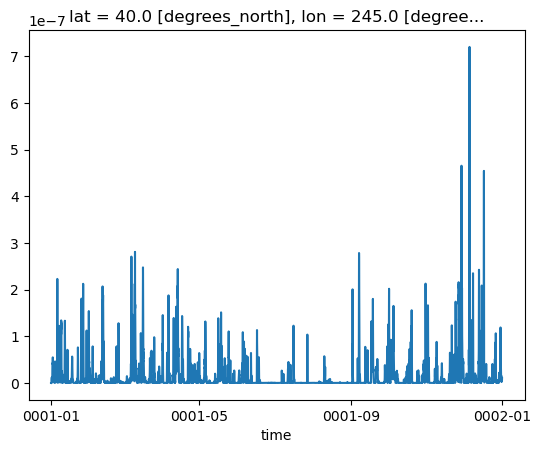

In [11]:
precip_1.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


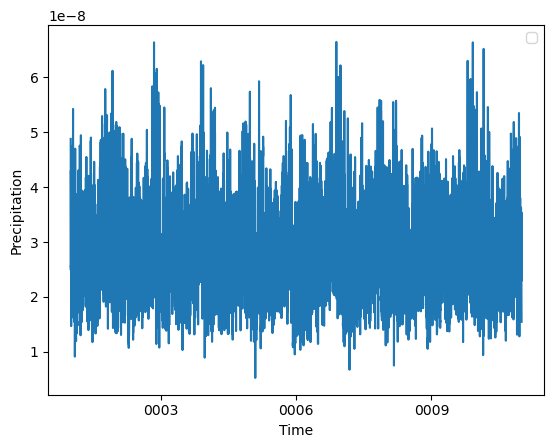

In [12]:
#Make time series
# plt.plot(time, precip_avg_plot, label = 'Average Precipitation')
precip_avg_plot.plot()
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

In [13]:
for i in np.arange(0,24,1):
    #print(i)
    precip_slice = precip[i,:,:]
#present day simulations, no interactive oceans repeats for all 10 years
#No el niño, etc. green house gases constant

<Figure size 640x480 with 0 Axes>

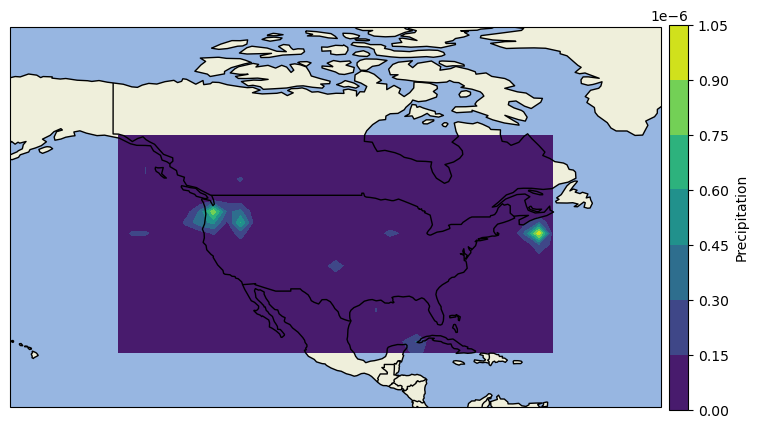

In [14]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())  # Set map extent

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
contour = ax.contourf(lon, lat, precip_slice, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation')